## Data cleaning & Preparation

**Deepa Kushwaha**

- Check for any data quality issues
- Encoding Categorical Variables


#### Classification problem 


In [665]:
import pandas as pd
import numpy as np                       # For mathematical calculations
import matplotlib.pyplot as plt         # For plotting graphs 
import seaborn as sns                   # For visualizations

%matplotlib inline
import warnings                         # To ignore any warnings
warnings.filterwarnings('ignore')

In [666]:
#Getting the system ready and loading the data

df = pd.read_csv("data.csv")
df.drop(['Unnamed: 0'], axis= 1, inplace= True)
df.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 27 columns):
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-null object
type_of_shot             15417 non-

In [668]:
df = df.dropna(subset=['is_goal'])


In [669]:
df.shape            # rows = 24429 & column =27

(24429, 27)

In [670]:
df.describe()   # # overview the statitics of car_df part

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,23189.000000,23273.000000,23184.000000,23185.000000,23229.000000,23217.000000,23179.000000,23172.000000,24429.000000,23179.000000,2.442900e+04,2.442900e+04,23220.000000,23221.000000,23215.000000,23229.000000,23185.00000
mean,249.575402,7.494178,91.461180,4.881044,2.521503,0.145712,28.289788,33.467159,0.445331,15343.145865,2.474317e+07,1.610613e+09,18.151628,15.982781,16.520622,38.849996,38.75581
std,150.052347,110.126457,88.041628,3.454113,1.153056,0.352825,17.508097,9.380114,0.497013,8869.100024,7.745041e+06,0.000000e+00,29.432083,29.640257,35.093964,29.753285,18.66849
min,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,2.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.40000
25%,111.000000,-67.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7659.500000,2.050006e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.00000
50%,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15356.000000,2.090034e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.00000
75%,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,22998.500000,2.960027e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.00000
max,653.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.72800


In [671]:
df.duplicated().sum()

0

In [672]:
df.isnull().any()       #their is null values present

match_event_id            True
location_x                True
location_y                True
remaining_min             True
power_of_shot             True
knockout_match            True
game_season               True
remaining_sec             True
distance_of_shot          True
is_goal                  False
area_of_shot              True
shot_basics               True
range_of_shot             True
team_name                 True
date_of_game              True
home/away                 True
shot_id_number            True
lat/lng                   True
type_of_shot              True
type_of_combined_shot     True
match_id                 False
team_id                  False
remaining_min.1           True
power_of_shot.1           True
knockout_match.1          True
remaining_sec.1           True
distance_of_shot.1        True
dtype: bool

***By comparing the above two cells, we find that apart from 'match_id' , 'team_id' , 'shot_id_number' & 'is_goal', all other features have not NULL values.***

Catgorical Variables:

- area_of_shot
- shot_basics
- home/away
- type_of_shot
- type_of_combined_shot

Dropping knockout_match.1, remaining_min.1, power_of_shot.1 since they contain weird values



In [673]:
df = df.drop(['match_event_id', 'location_x', 'location_y', 'game_season', 'team_name','lat/lng','date_of_game',''
              'date_of_game', 'lat/lng', 'match_id',"remaining_min.1",'power_of_shot.1','knockout_match.1', 'team_id'], axis = 1)



In [674]:
df.dtypes

remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot              object
shot_basics               object
range_of_shot             object
home/away                 object
shot_id_number           float64
type_of_shot              object
type_of_combined_shot     object
remaining_sec.1          float64
distance_of_shot.1       float64
dtype: object

In [675]:
df['remaining_min'].value_counts()


0.0     2921
4.0     2176
2.0     2169
3.0     2127
1.0     2080
5.0     1968
6.0     1776
9.0     1696
7.0     1684
10.0    1612
8.0     1580
11.0    1396
Name: remaining_min, dtype: int64

**Numeric Variables**

- remaining_min
- power_of_shot
- knockout_match
- remaining_sec
- remaining_sec.1
- distance_of_shot
- distance_of_shot.1

**Categorical Variables:**

- area_of_shot
- shot_basics
- range_of_shot
- home/away
- type_of_shot
- type_of_combined_shot


**Treat Missing Values** We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

**For numerical variables**: imputation using mean or median

**For categorical variables**: imputation using mode

In [676]:
# for Categorical variable

df['area_of_shot'].fillna(df['area_of_shot'].mode()[0], inplace=True) 
df['shot_basics'].fillna(df['shot_basics'].mode()[0], inplace=True) 
df['range_of_shot'].fillna(df['range_of_shot'].mode()[0], inplace=True) 
df['home/away'].fillna(df['home/away'].mode()[0], inplace=True) 
df['type_of_shot'].fillna(df['type_of_shot'].mode()[0], inplace=True)
df['type_of_combined_shot'].fillna(df['type_of_combined_shot'].mode()[0], inplace=True)

In [677]:
#For numerical variables
df['remaining_min'].fillna(df['remaining_min'].median(), inplace=True)
df['power_of_shot'].fillna(df['power_of_shot'].median(), inplace=True)
df['knockout_match'].fillna(df['knockout_match'].median(), inplace=True)
df['remaining_sec'].fillna(df['remaining_sec'].median(), inplace=True)
df['distance_of_shot'].fillna(df['distance_of_shot'].median(), inplace=True)
df['shot_id_number'].fillna(df['shot_id_number'].median(), inplace=True)
df['remaining_sec.1'].fillna(df['remaining_sec.1'].median(), inplace=True)
df['distance_of_shot.1'].fillna(df['distance_of_shot.1'].median(), inplace=True)

In [678]:
df.isnull().any()

remaining_min            False
power_of_shot            False
knockout_match           False
remaining_sec            False
distance_of_shot         False
is_goal                  False
area_of_shot             False
shot_basics              False
range_of_shot            False
home/away                False
shot_id_number           False
type_of_shot             False
type_of_combined_shot    False
remaining_sec.1          False
distance_of_shot.1       False
dtype: bool

In [679]:
df.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_sec.1,distance_of_shot.1
1,10.0,1.0,0.0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,2.0,shot - 45,shot - 3,22.0000,35.0
2,7.0,1.0,0.0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,MANU @ SAS,3.0,shot - 25,shot - 3,63.7216,54.4
3,6.0,1.0,0.0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,MANU @ POR,4.0,shot - 39,shot - 3,52.0000,42.0
4,5.0,2.0,0.0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,MANU @ POR,5.0,shot - 39,shot - 1,19.0000,20.0
5,9.0,3.0,0.0,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,MANU @ POR,6.0,shot - 17,shot - 3,35.0000,34.0


**Encoding Categorical Data - So LabelEncoder must be used prior to one-hot encoding** 

Categorical Variables:

- area_of_shot
- shot_basics
- range_of_shot
- home/away
- type_of_shot
- type_of_combined_shot

**LabelEncoder** is to assign ordinal levels to categorical data

In [680]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()                  #LabelEncoder is to assign ordinal levels to categorical data.

df['area_of_shot'] = le.fit_transform(df['area_of_shot'])
df['shot_basics'] = le.fit_transform(df['shot_basics'])
df['range_of_shot'] = le.fit_transform(df['range_of_shot'])
df['home/away'] = le.fit_transform(df['home/away'])
df['type_of_shot'] = le.fit_transform(df['type_of_shot'])
df['type_of_combined_shot'] = le.fit_transform(df['type_of_combined_shot'])


In [681]:
df.head()

,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_shot,type_of_combined_shot,remaining_sec.1,distance_of_shot.1
1,10.0,1.0,0.0,22.0,35.0,0.0,2,4,2,28,2.0,40,3,22.0000,35.0
2,7.0,1.0,0.0,45.0,36.0,1.0,1,4,0,30,3.0,18,3,63.7216,54.4
3,6.0,1.0,0.0,52.0,42.0,0.0,4,4,0,28,4.0,33,3,52.0000,42.0
4,5.0,2.0,0.0,19.0,20.0,1.0,0,0,4,28,5.0,33,1,19.0000,20.0
5,9.0,3.0,0.0,32.0,34.0,0.0,2,4,2,28,6.0,9,3,35.0000,34.0


In [682]:
X = df.copy()

In [683]:
y = df['is_goal'].copy()

In [684]:
X = df.drop(['is_goal', 'remaining_sec.1', 'distance_of_shot.1', 'shot_id_number'], 1 )


In [685]:
Y = pd.DataFrame(y)     # target Variable
Y.head()

,is_goal
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0


In [686]:
Y.shape

(24429, 1)

In [687]:
X.shape

(24429, 11)

In [688]:
X = np.asarray(X)
y = np.asarray(y)

## Exploratory Data Analysis (EDA)

- Univariate Analysis and
- Bivariate Analysis

#### Univariate Analysis
**In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.**

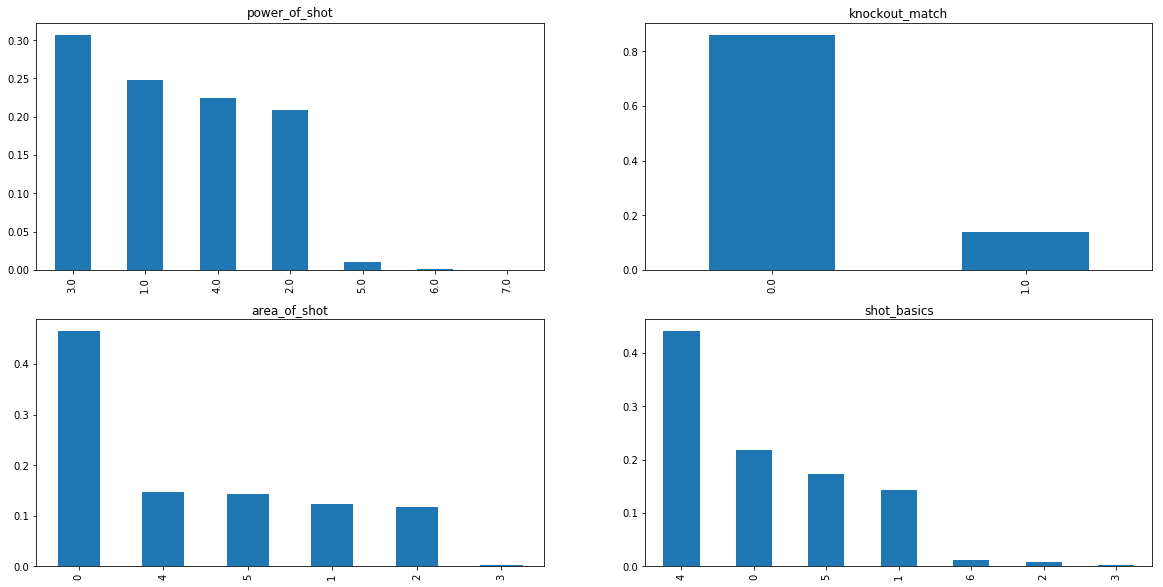

In [689]:

plt.figure(1) 

plt.subplot(221) 
df['power_of_shot'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'power_of_shot') 

plt.subplot(222) 
df['knockout_match'].value_counts(normalize=True).plot.bar(title= 'knockout_match') 

plt.subplot(223) 
df['area_of_shot'].value_counts(normalize=True).plot.bar(title= 'area_of_shot') 

plt.subplot(224) 
df['shot_basics'].value_counts(normalize=True).plot.bar(title= 'shot_basics') 

plt.show()

#### Bivariate Analysis - 
**In this section, we will do Bivariate analysis.It is the simplest form of analyzing data with respect to the target variable.**

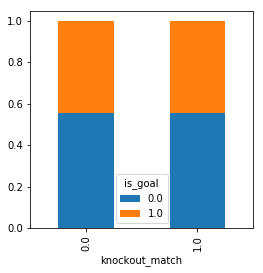

In [690]:
knockout_match=pd.crosstab(df['knockout_match'], df['is_goal']) 
knockout_match.div(knockout_match.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

- Remove numerical variable (remaining_sec.1, distance_of_shot.1, shot_id_number)
- Remove **Target Variable(is_goal)** to creat independent variable datasets


## Model Building

**Splitting the Data into Training and Testing Sets**

In [691]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  train_size = 0.7, test_size = 0.3, random_state = 100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25658029391297227, random_state = 100)             #(6268/24429= 0.25658029391297227)


**logistic regression**

In [692]:
# train a logistic regression model on the training set

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [693]:
#Let’s predict the 'is_goal' for validation set and calculate its accuracy.
y_pred = logreg.predict(X_test)         

**Classification accuracy:** percentage of correct predictions

In [694]:
# Let us calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(Y_test, y_pred)

0.5958838544990428

#### So our predictions are almost  **60%** accurate, i.e. we have identified 60% of the 'is_goal' correctly.


.

**Evaluation metrics** for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

In [695]:
# Mean absolute (MAE) is the mean of the squared errors:

from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, y_pred))

0.40411614550095726


**Mean absolute Error** is minimize,beacuse the **lower number for MAE is better**.) Thus, model is performining well

**DecisionTree**

In [696]:
# train a logistic DecisionTree model on the training set
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 10, random_state = 10, max_features = None, min_samples_leaf = 15)

# fit model
dtree.fit(X_train, Y_train)
y_pred_dt = dtree.predict(X_test)

In [697]:
#Let us calculate how accurate our predictions are by calculating the accuracy.
dtree.score(X_test, Y_test)

0.6244416081684748

#### Evaluation metrics

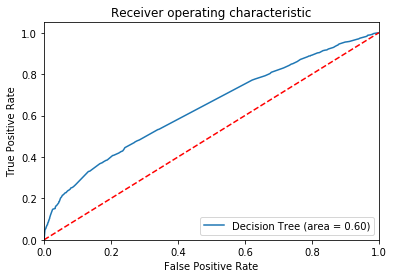

In [698]:
# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

dtree_roc_auc = roc_auc_score(Y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(Y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [699]:
y_pred_dt.size

6268

**Random Forest Classifier**

Hyperparameter Optiization for Random Forest Classifier

In [700]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 10)]
max_depth.append(None)
max_features = ['auto', 'sqrt']

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
}

estimator = RandomForestClassifier(random_state = 69)
cv_test = KFold(n_splits=5)
gscv = GridSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = cv_test, 
                        verbose = 2)

gscv.fit(X_train, Y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 501 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:  2.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=69,
                                              verbose=0, warm_start=False),
 

In [719]:
gscv.best_params_

{'max_depth': 11, 'max_features': 'auto', 'n_estimators': 20}

In [720]:
best_model = gscv.best_estimator_

In [721]:
best_model.score(X_test,Y_test)

0.6194958519463943

In [722]:
rf2_pred = best_model.predict(X_test)
rf2_prob = best_model.predict_proba(X_test)[:, 1]

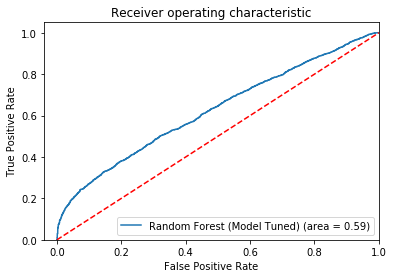

In [723]:
rf2_roc_auc = roc_auc_score(Y_test, rf2_pred)
fpr, tpr, thresholds = roc_curve(Y_test, rf2_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Model Tuned) (area = %0.2f)' % rf2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [724]:
y_pred_dt.size

6268

In [725]:
prob = pd.DataFrame(rf2_prob)
prob['is_goal'] = prob[0]

In [726]:
prob.head()


,0,is_goal
0,0.652802,0.652802
1,0.383666,0.383666
2,0.431936,0.431936
3,0.509519,0.509519
4,0.327125,0.327125


In [727]:
prob = prob.drop([0], axis = 1)

In [728]:
prob['is_goal'].isnull().any()


False

In [729]:
df.shape

(24429, 15)

In [730]:
prob.shape

(6268, 1)

In [731]:
submit =  df[['shot_id_number']].copy()


In [732]:
submit = submit.reset_index()

In [733]:
submit.isnull().any()

index             False
shot_id_number    False
dtype: bool

In [734]:
submit['is_goal'] = prob[['is_goal']].copy()


In [736]:
submit.to_csv('Deepa_Kushwaha_04071995_prediction_1.csv')